# Prediksi Diabetes Menggunakan Machine Learning Deep Neural Network

Diabetes adalah penyakit kronis yang ditandai dengan tingginya kadar gula darah. Gula darah adalah sumber energi utama bagi sel tubuh manusia. Akan tetapi, pada penderita diabetes, glukosa tersebut tidak dapat digunakan oleh tubuh.

Kadar gula darah dikendalikan oleh hormon insulin yang diproduksi pankreas. Namun, pada penderita diabetes, pankreas tidak mampu memproduksi insulin sesuai kebutuhan tubuh. Tanpa insulin, sel-sel tubuh tidak dapat menyerap dan mengolah glukosa menjadi energi.

Ada dua jenis diabetes, yaitu diabetes tipe 1 dan diabetes tipe 2. Diabetes tipe 1 adalah penyakit autoimun yang menyebabkan sistem kekebalan tubuh menyerang dan menghancurkan sel-sel penghasil insulin di pankreas. Diabetes tipe 2 adalah penyakit yang disebabkan oleh kombinasi faktor genetik, gaya hidup, dan obesitas.

Dataset ini berasal dari POSBINDU Puskesmas Mergangsan. Tujuan dari kumpulan data ini adalah untuk memprediksi secara diagnostik apakah pasien menderita diabetes atau tidak, berdasarkan pengukuran diagnostik tertentu yang disertakan dalam kumpulan data. Beberapa batasan ditempatkan pada pemilihan contoh-contoh ini dari basis data yang lebih besar.

## Tujuan
Peneliti membangun model pembelajaran mesin untuk memprediksi secara akurat apakah pasien dalam dataset tersebut mengidap diabetes atau tidak?

## Detail tentang dataset:

- **SEXVAR**: Jenis Kelamin
- **_SMOKER3**: Merokok
- **DIABETE4**: Status Diabetes
- **BPHIGH6**: Status Hipertensi / Tekanan Darah Tinggi
- **_AGEG5YR**: Usia
- **EXERANY2**: Aktivitas Fisik
- **ALCDAY5**: Konsumsi Alkohol
- **_BMI5CAT**: Indeks Masa Tubuh
- **WTKG3**: Berat Badan
- **HTM4**: Tinggi Badan

**Jumlah Unit Observasi: 100**

**Jumlah Variabel: 11**

-----------------------------------------------------------------------------------------------------------

**1. Import Library** 

   Untuk Running Pre-Processing Model perlu menampilkan beberapa library yang digunakan pada permodelan ini

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from numpy import loadtxt

from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import  LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(color_codes=True)

**2. Import Dataset**

Menampilkan dataset kedalam Dataframe

In [2]:
df = pd.read_excel('D:\- Skripsi -\SC DATA\BRFSS DATASET\DATA MERGANGSAN 2023 Terbaru.xlsx')
df.head(5)    # menampilkan data teratas

,SEXVAR,_SMOKER3,WTKG3,HTM4,_BMI5CAT,BPHIGH6,_AGEG5YR,EXERANY2,ALCDAY5,DIABETE4
0,Perempuan,Tidak,45,155,18.730489,Ya,30 - 34,Ya,Tidak,Tidak
1,Laki Laki,Tidak,69,169,24.158818,Tidak,30 - 34,Ya,Tidak,Ya
2,Perempuan,Tidak,34,153,14.524328,Ya,40 - 44,Ya,Tidak,Ya
3,Perempuan,Tidak,69,158,27.639801,Ya,30 - 34,Tidak,Tidak,Tidak
4,Perempuan,Tidak,51,157,20.690495,Tidak,50 - 54,Ya,Tidak,Tidak


In [3]:
df.tail(5)    # menampilkan data terbawah

,SEXVAR,_SMOKER3,WTKG3,HTM4,_BMI5CAT,BPHIGH6,_AGEG5YR,EXERANY2,ALCDAY5,DIABETE4
95,Perempuan,Tidak,60,157,24.341758,Tidak,50 - 54,Tidak,Tidak,Tidak
96,Perempuan,Tidak,66,152,28.566482,Tidak,35 - 39,Tidak,Tidak,Tidak
97,Perempuan,Tidak,55,143,26.896181,Ya,45 - 49,Tidak,Tidak,Tidak
98,Laki Laki,Tidak,67,172,22.647377,Ya,30 - 34,Tidak,Tidak,Tidak
99,Perempuan,Tidak,55,142,27.276334,Ya,30 - 34,Tidak,Tidak,Tidak


menampilkan jumlah row dan columns

In [4]:
df.shape

(100, 10)

**3. Menampilkan Tipe Dataset**

In [5]:
df.dtypes  # menampilkan tipe variabel yang terdapat pada dataframe

SEXVAR       object
_SMOKER3     object
WTKG3         int64
HTM4          int64
_BMI5CAT    float64
BPHIGH6      object
_AGEG5YR     object
EXERANY2     object
ALCDAY5      object
DIABETE4     object
dtype: object

**4. Menampilkan Index Atribut Yang Dipilih**

In [6]:
df.columns

Index(['SEXVAR', '_SMOKER3', 'WTKG3', 'HTM4', '_BMI5CAT', 'BPHIGH6',
       '_AGEG5YR', 'EXERANY2', 'ALCDAY5', 'DIABETE4'],
      dtype='object')

**5. Menampilkan Hasil Dari Satu Atribut** 

   fungsinya untuk mengetahui hasil dari atribut "DIABETE4" dikarenakan hasil tersebut menjadi hasil dari dataset diatas, dan menghitung jumlah data spesifik dari columns "DIABETE4"

In [7]:
df['DIABETE4'].value_counts()

DIABETE4
Tidak    76
Ya       23
Name: count, dtype: int64

**6. Menghilangkan Data Yang Duplikat**

   fungsinya agar memaksimalkan kerja model dengan mengoptimalkan dataset yang ada dengan menghilangkan dataset yang terduplikat, efek dari data duplikat akan membuat model lama untuk menjalankan Machine Learning

In [8]:
duplicate_row_df = df[df.duplicated()]
print("Jumlah Baris Duplikat:", duplicate_row_df.shape) # untuk menampilkan jumlah dataset yang duplikat ada berapa

Jumlah Baris Duplikat: (1, 10)


**Sebelum Data Duplikat Dihilangkan**

In [9]:
df.count()

SEXVAR      100
_SMOKER3     98
WTKG3       100
HTM4        100
_BMI5CAT    100
BPHIGH6     100
_AGEG5YR     90
EXERANY2     99
ALCDAY5      99
DIABETE4     99
dtype: int64

**Proses Penghapusan Data Yang Duplikat**

disini menjalankan proses penghapusan data yang terduplikat

In [10]:
df = df.drop_duplicates()
df.head(5)

,SEXVAR,_SMOKER3,WTKG3,HTM4,_BMI5CAT,BPHIGH6,_AGEG5YR,EXERANY2,ALCDAY5,DIABETE4
0,Perempuan,Tidak,45,155,18.730489,Ya,30 - 34,Ya,Tidak,Tidak
1,Laki Laki,Tidak,69,169,24.158818,Tidak,30 - 34,Ya,Tidak,Ya
2,Perempuan,Tidak,34,153,14.524328,Ya,40 - 44,Ya,Tidak,Ya
3,Perempuan,Tidak,69,158,27.639801,Ya,30 - 34,Tidak,Tidak,Tidak
4,Perempuan,Tidak,51,157,20.690495,Tidak,50 - 54,Ya,Tidak,Tidak


In [11]:
df.tail(5)

,SEXVAR,_SMOKER3,WTKG3,HTM4,_BMI5CAT,BPHIGH6,_AGEG5YR,EXERANY2,ALCDAY5,DIABETE4
95,Perempuan,Tidak,60,157,24.341758,Tidak,50 - 54,Tidak,Tidak,Tidak
96,Perempuan,Tidak,66,152,28.566482,Tidak,35 - 39,Tidak,Tidak,Tidak
97,Perempuan,Tidak,55,143,26.896181,Ya,45 - 49,Tidak,Tidak,Tidak
98,Laki Laki,Tidak,67,172,22.647377,Ya,30 - 34,Tidak,Tidak,Tidak
99,Perempuan,Tidak,55,142,27.276334,Ya,30 - 34,Tidak,Tidak,Tidak


**Setelah Data Di Hapus Duplikatnya**

In [12]:
df.count()

SEXVAR      99
_SMOKER3    97
WTKG3       99
HTM4        99
_BMI5CAT    99
BPHIGH6     99
_AGEG5YR    90
EXERANY2    98
ALCDAY5     98
DIABETE4    98
dtype: int64

In [13]:
df.shape

(99, 10)

**7. Menghilangkan Data Yang Bernilai "NOL"**

   Pada DNN, langkah ini penting dikarenakan perlunya mengetahui serta menghapus data yang bersifat "NULL", ada beberapa cara untuk mengatasi miss value ini dengan mencari rata2 dari tiap atribut, dengan mengisi data yang "NULL" dengan nilai yang sama semua, dan menghitung nilai "NULL" dengan diperkirakan secara manual.

In [14]:
print(df.isnull().sum())

SEXVAR      0
_SMOKER3    2
WTKG3       0
HTM4        0
_BMI5CAT    0
BPHIGH6     0
_AGEG5YR    9
EXERANY2    1
ALCDAY5     1
DIABETE4    1
dtype: int64


keterangan diatas menunjukkan bahwa yang terdapat missing value dari setiap atribut terdapat pada atribut

**_SMOKER3, _AGEG5YR, EXERANY2, ALCDAY5, DIABETE4**

In [15]:
df = df.dropna()    #Sebelum Dilakukan Dropping Missing Value
df.count()

SEXVAR      87
_SMOKER3    87
WTKG3       87
HTM4        87
_BMI5CAT    87
BPHIGH6     87
_AGEG5YR    87
EXERANY2    87
ALCDAY5     87
DIABETE4    87
dtype: int64

In [16]:
print(df.isnull().sum())   #Setelah dilakukan Dropping Missing Value

SEXVAR      0
_SMOKER3    0
WTKG3       0
HTM4        0
_BMI5CAT    0
BPHIGH6     0
_AGEG5YR    0
EXERANY2    0
ALCDAY5     0
DIABETE4    0
dtype: int64


setelah proses selesai kita cek kembali dataframe yang tadi telah dilakukan proses penghilangan missing value

In [17]:
df.head(5)

,SEXVAR,_SMOKER3,WTKG3,HTM4,_BMI5CAT,BPHIGH6,_AGEG5YR,EXERANY2,ALCDAY5,DIABETE4
0,Perempuan,Tidak,45,155,18.730489,Ya,30 - 34,Ya,Tidak,Tidak
1,Laki Laki,Tidak,69,169,24.158818,Tidak,30 - 34,Ya,Tidak,Ya
2,Perempuan,Tidak,34,153,14.524328,Ya,40 - 44,Ya,Tidak,Ya
3,Perempuan,Tidak,69,158,27.639801,Ya,30 - 34,Tidak,Tidak,Tidak
4,Perempuan,Tidak,51,157,20.690495,Tidak,50 - 54,Ya,Tidak,Tidak


In [18]:
df.tail(5)

,SEXVAR,_SMOKER3,WTKG3,HTM4,_BMI5CAT,BPHIGH6,_AGEG5YR,EXERANY2,ALCDAY5,DIABETE4
95,Perempuan,Tidak,60,157,24.341758,Tidak,50 - 54,Tidak,Tidak,Tidak
96,Perempuan,Tidak,66,152,28.566482,Tidak,35 - 39,Tidak,Tidak,Tidak
97,Perempuan,Tidak,55,143,26.896181,Ya,45 - 49,Tidak,Tidak,Tidak
98,Laki Laki,Tidak,67,172,22.647377,Ya,30 - 34,Tidak,Tidak,Tidak
99,Perempuan,Tidak,55,142,27.276334,Ya,30 - 34,Tidak,Tidak,Tidak


In [19]:
df.shape

(87, 10)

**8. Outlier**

<function matplotlib.pyplot.show(close=None, block=None)>

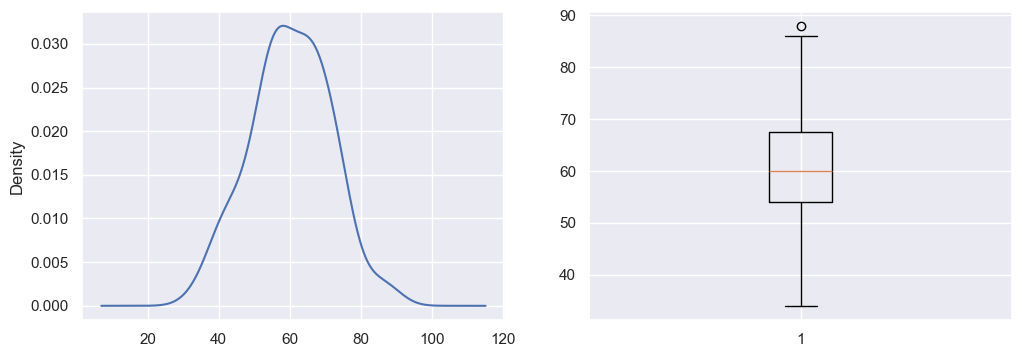

In [20]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['WTKG3'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['WTKG3'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

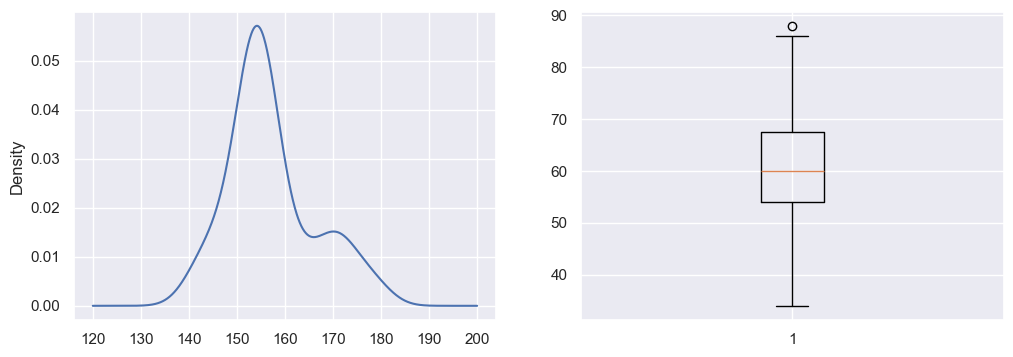

In [21]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['HTM4'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['WTKG3'])
plt.show

**9. Feature Engineering**

In [22]:
# Berdasarkan BMI, beberapa rentang ditentukan dan variabel kategorikal ditetapkan.
NewBMI = pd.Series(["0", "1", "2", "3"], dtype = "int32")
df["NewBMI"] = NewBMI
df.loc[df["_BMI5CAT"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["_BMI5CAT"] > 18.5) & (df["_BMI5CAT"] <= 25), "NewBMI"] = NewBMI[1]
df.loc[(df["_BMI5CAT"] > 25) & (df["_BMI5CAT"] <= 30), "NewBMI"] = NewBMI[2]
df.loc[df["_BMI5CAT"] > 30 ,"NewBMI"] = NewBMI[3]

In [23]:
df.head(10)

,SEXVAR,_SMOKER3,WTKG3,HTM4,_BMI5CAT,BPHIGH6,_AGEG5YR,EXERANY2,ALCDAY5,DIABETE4,NewBMI
0,Perempuan,Tidak,45,155,18.730489,Ya,30 - 34,Ya,Tidak,Tidak,1.0
1,Laki Laki,Tidak,69,169,24.158818,Tidak,30 - 34,Ya,Tidak,Ya,1.0
2,Perempuan,Tidak,34,153,14.524328,Ya,40 - 44,Ya,Tidak,Ya,0.0
3,Perempuan,Tidak,69,158,27.639801,Ya,30 - 34,Tidak,Tidak,Tidak,2.0
4,Perempuan,Tidak,51,157,20.690495,Tidak,50 - 54,Ya,Tidak,Tidak,1.0
5,Perempuan,Tidak,62,152,26.835180,Ya,50 - 54,Ya,Tidak,Tidak,2.0
6,Perempuan,Tidak,38,155,15.816857,Ya,18 - 24,Ya,Tidak,Tidak,0.0
9,Perempuan,Tidak,53,149,23.872799,Ya,30 - 34,Ya,Tidak,Tidak,1.0
17,Perempuan,Tidak,54,149,24.323229,Ya,40 - 44,Ya,Tidak,Ya,1.0
18,Perempuan,Tidak,54,154,22.769438,Tidak,30 - 34,Ya,Tidak,Tidak,1.0


**10. One Hot Encoding**

Variabel kategorikal dalam kumpulan data harus diubah menjadi nilai numerik. Untuk alasan ini, proses transformasi ini dilakukan dengan metode Label Encoding dan One Hot Encoding.

Elemen Unik dalam Kolom Kategorikal

In [24]:
print(df['SEXVAR'].unique())
print(df['_SMOKER3'].unique())
print(df['BPHIGH6'].unique())
print(df['_AGEG5YR'].unique())
print(df['EXERANY2'].unique())
print(df['ALCDAY5'].unique())
print(df['DIABETE4'].unique())

['Perempuan' 'Laki Laki']
['Tidak' 'Ya']
['Ya' 'Tidak']
['30 - 34' '40 - 44' '50 - 54' '18 - 24' '55 - 59' '35 - 39' '45 - 49']
['Ya' 'Tidak']
['Tidak' 'Ya']
['Tidak' 'Ya']


Jumlah Elemen dalam Kolom

In [25]:
df['SEXVAR'].value_counts() 
df['_SMOKER3'].value_counts() 
df['BPHIGH6'].value_counts() 
df['_AGEG5YR'].value_counts() 
df['EXERANY2'].value_counts() 
df['ALCDAY5'].value_counts() 
df['DIABETE4'].value_counts() 

DIABETE4
Tidak    66
Ya       21
Name: count, dtype: int64

One-Hot Encoding untuk Kolom Kategorikal Menggunakan Sci-kit Learn

In [26]:
# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 

In [27]:
encoder_list = {}
clean_df = df.copy()
for column in clean_df.columns:
    if column != 'DIABETE4':
        if clean_df[column].dtype == 'object':
            print(column)
            encoder = OneHotEncoder(sparse=False, drop=None)
            
            test_encoder = pd.DataFrame()
            test_encoder[column] = clean_df[column].copy()
            encoder_list[column] = encoder.fit(test_encoder)
            encoded_data = encoder.transform(test_encoder)

            result = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out()).astype(int)
            clean_df = pd.concat([clean_df, result], axis=1)
            clean_df.drop(column, axis=1, inplace=True)

SEXVAR
_SMOKER3
BPHIGH6
_AGEG5YR
EXERANY2
ALCDAY5


In [28]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 44
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WTKG3             87 non-null     float64
 1   HTM4              87 non-null     float64
 2   _BMI5CAT          87 non-null     float64
 3   DIABETE4          87 non-null     object 
 4   NewBMI            87 non-null     float64
 5   SEXVAR_Laki Laki  87 non-null     float64
 6   SEXVAR_Perempuan  87 non-null     float64
 7   _SMOKER3_Tidak    100 non-null    int32  
 8   _SMOKER3_Ya       100 non-null    int32  
 9   _SMOKER3_nan      100 non-null    int32  
 10  BPHIGH6_Tidak     100 non-null    int32  
 11  BPHIGH6_Ya        100 non-null    int32  
 12  BPHIGH6_nan       100 non-null    int32  
 13  _AGEG5YR_18 - 24  100 non-null    int32  
 14  _AGEG5YR_30 - 34  100 non-null    int32  
 15  _AGEG5YR_35 - 39  100 non-null    int32  
 16  _AGEG5YR_40 - 44  100 non-null    int32  
 17  _AG

In [29]:
clean_df['DIABETE4'].unique()

array(['Tidak', 'Ya', nan], dtype=object)

In [30]:
clean_df['DIABETE4'].isna().sum()

13

In [31]:
clean_df = clean_df.dropna()
clean_df

,WTKG3,HTM4,_BMI5CAT,DIABETE4,NewBMI,SEXVAR_Laki Laki,SEXVAR_Perempuan,_SMOKER3_Tidak,_SMOKER3_Ya,_SMOKER3_nan,...,_AGEG5YR_45 - 49,_AGEG5YR_50 - 54,_AGEG5YR_55 - 59,_AGEG5YR_nan,EXERANY2_Tidak,EXERANY2_Ya,EXERANY2_nan,ALCDAY5_Tidak,ALCDAY5_Ya,ALCDAY5_nan
0,45.0,155.0,18.730489,Tidak,1.0,0.0,1.0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,69.0,169.0,24.158818,Ya,1.0,1.0,0.0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,34.0,153.0,14.524328,Ya,0.0,0.0,1.0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,69.0,158.0,27.639801,Tidak,2.0,0.0,1.0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,51.0,157.0,20.690495,Tidak,1.0,0.0,1.0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,56.0,154.0,23.612751,Tidak,1.0,0.0,1.0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
83,64.0,153.0,27.339912,Tidak,2.0,0.0,1.0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
84,76.0,172.0,25.689562,Tidak,2.0,0.0,1.0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
85,58.0,149.0,26.124949,Tidak,2.0,1.0,0.0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [32]:
map_diabet = {'Ya':1, 'Tidak':0}

clean_df['DIABETE4'] = clean_df['DIABETE4'].map(map_diabet)
clean_df['DIABETE4']

0     0
1     1
2     1
3     0
4     0
     ..
82    0
83    0
84    0
85    0
86    0
Name: DIABETE4, Length: 74, dtype: int64

In [33]:
for column in clean_df.columns:
    if clean_df[column].dtype == 'float64' or clean_df[column].dtype == 'int64' or clean_df[column].dtype == 'int32' or df[column].dtype == 'float32':
        clean_df[column] = clean_df[column].astype('int32')
    #if df[column].dtype == 'int64':
    #    df[column] = df[column].astype('int32')

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 0 to 86
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   WTKG3             74 non-null     int32
 1   HTM4              74 non-null     int32
 2   _BMI5CAT          74 non-null     int32
 3   DIABETE4          74 non-null     int32
 4   NewBMI            74 non-null     int32
 5   SEXVAR_Laki Laki  74 non-null     int32
 6   SEXVAR_Perempuan  74 non-null     int32
 7   _SMOKER3_Tidak    74 non-null     int32
 8   _SMOKER3_Ya       74 non-null     int32
 9   _SMOKER3_nan      74 non-null     int32
 10  BPHIGH6_Tidak     74 non-null     int32
 11  BPHIGH6_Ya        74 non-null     int32
 12  BPHIGH6_nan       74 non-null     int32
 13  _AGEG5YR_18 - 24  74 non-null     int32
 14  _AGEG5YR_30 - 34  74 non-null     int32
 15  _AGEG5YR_35 - 39  74 non-null     int32
 16  _AGEG5YR_40 - 44  74 non-null     int32
 17  _AGEG5YR_45 - 49  74 non-null     int32
 1

In [34]:
clean_df.head()

,WTKG3,HTM4,_BMI5CAT,DIABETE4,NewBMI,SEXVAR_Laki Laki,SEXVAR_Perempuan,_SMOKER3_Tidak,_SMOKER3_Ya,_SMOKER3_nan,...,_AGEG5YR_45 - 49,_AGEG5YR_50 - 54,_AGEG5YR_55 - 59,_AGEG5YR_nan,EXERANY2_Tidak,EXERANY2_Ya,EXERANY2_nan,ALCDAY5_Tidak,ALCDAY5_Ya,ALCDAY5_nan
0,45,155,18,0,1,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,69,169,24,1,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,34,153,14,1,0,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,69,158,27,0,2,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,51,157,20,0,1,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0


**11. Normalisasi Data Menggunakan Min-Max Scaling**

In [35]:
#scaler = MinMaxScaler()

In [36]:
#scaler.fit(data)

In [37]:
#data_norm = scaler.transform(data)

**11. Import Library Yangt Diperlukan Pada Proses K-Fold Cross Validation**

In [38]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.datasets import load_digits

**12. Konversi Dataframe Menjadi Data Matrix**

In [39]:
data_matrix = clean_df.values

print(data_matrix)

[[ 45 155  18 ...   1   0   0]
 [ 69 169  24 ...   1   0   0]
 [ 34 153  14 ...   1   0   0]
 ...
 [ 76 172  25 ...   1   0   0]
 [ 58 149  26 ...   1   0   0]
 [ 88 148  40 ...   1   0   0]]


In [40]:
data_train = np.array(data_matrix[:, :6])     # Membagi data menjadi Fitur dan Target
data_test = np.array(data_matrix[:, 6])

print(data_train)

[[ 45 155  18   0   1   0]
 [ 69 169  24   1   1   1]
 [ 34 153  14   1   0   0]
 [ 69 158  27   0   2   0]
 [ 51 157  20   0   1   0]
 [ 62 152  26   0   2   0]
 [ 38 155  15   0   0   0]
 [ 53 149  23   0   1   0]
 [ 54 149  24   1   1   0]
 [ 54 154  22   0   1   1]
 [ 65 154  27   0   2   1]
 [ 61 176  19   1   1   1]
 [ 41 155  17   1   0   0]
 [ 61 158  24   1   1   0]
 [ 54 154  22   1   1   1]
 [ 68 159  26   0   2   0]
 [ 73 177  23   0   1   0]
 [ 43 154  18   0   0   0]
 [ 73 169  25   1   2   0]
 [ 68 154  28   0   2   1]
 [ 50 153  21   0   1   0]
 [ 49 155  20   0   1   1]
 [ 40 157  16   1   0   1]
 [ 51 163  19   0   1   0]
 [ 71 152  30   1   3   1]
 [ 67 179  20   0   1   0]
 [ 62 145  29   1   2   0]
 [ 59 165  21   0   1   0]
 [ 41 144  19   1   1   0]
 [ 48 163  18   1   0   1]
 [ 42 155  17   1   0   0]
 [ 73 169  25   1   2   0]
 [ 74 165  27   0   2   0]
 [ 45 145  21   0   1   0]
 [ 55 157  22   0   1   1]
 [ 77 167  27   0   2   0]
 [ 63 149  28   0   2   0]
 

In [41]:
cols = clean_df.select_dtypes(include=['object'])
for col in cols.columns.values:
    clean_df[col] = clean_df[col].fillna('')

**13. Train Test Split Data**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data_train, data_test, test_size=0.20)        # Train Test Split Data

**14. Menjalankan Validation Menggunakan Metode K-Fold Cross Validation**

Iterasi **"K"** yang digunakan berjumlah **10**

Pada pembuatan model kali ini kami akan membangun lalu **Fit** Model, lalu baru dilakukan Cross Validation agar model yang dibuat lebih optimal.

In [43]:
# K-fold cross-validation
kf = KFold(n_splits=10, random_state=10, shuffle=True)     # Untuk Objek Fold
print(kf)

KFold(n_splits=10, random_state=10, shuffle=True)


In [44]:
accuracy_val = []       # Menyimpan Hasil Pengukuran Setiap Fold
precission_val = []
recall_val = []
fmeasure_val = []

In [45]:
final_test_labels = []  # Menyimpan Fitur dan Target dari keseluruhan Fold
final_prediction = []

**15. Membangun Model Deep Neural Network**

Mengimport Library

In [46]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow as tf
#import keras
import keras.backend as K
import keras
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Embedding, Dropout, Input, Concatenate

Membangun Model

In [47]:
model = tf.keras.models.Sequential()

Input Layer, Hidden layer dan ReLU Activation Function

In [48]:
model = Sequential()
model.add(Dense(20,input_dim = 10,activation = 'relu', input_shape=(X_train.shape[1],)))
model.add(Dense(20,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

Compile Model

We are going to use Binary Cross Entropy for the loss function and adam for optimiser.

In [49]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

Train Model

In [50]:
epochs = 100
batch_size = 10
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/100
6/6 [==============================] - 4s 206ms/step - loss: 2.8187 - accuracy: 0.7627 - val_loss: 3.5565 - val_accuracy: 0.6667
Epoch 2/100
6/6 [==============================] - 0s 19ms/step - loss: 2.3802 - accuracy: 0.7627 - val_loss: 3.0355 - val_accuracy: 0.6667
Epoch 3/100
6/6 [==============================] - 0s 17ms/step - loss: 2.0080 - accuracy: 0.7627 - val_loss: 2.5744 - val_accuracy: 0.6667
Epoch 4/100
6/6 [==============================] - 0s 27ms/step - loss: 1.7390 - accuracy: 0.7627 - val_loss: 2.1790 - val_accuracy: 0.6667
Epoch 5/100
6/6 [==============================] - 0s 25ms/step - loss: 1.4631 - accuracy: 0.7627 - val_loss: 1.8595 - val_accuracy: 0.6667
Epoch 6/100
6/6 [==============================] - 0s 27ms/step - loss: 1.2274 - accuracy: 0.7627 - val_loss: 1.5571 - val_accuracy: 0.6667
Epoch 7/100
6/6 [==============================] - 0s 31ms/step - loss: 1.0402 - accuracy: 0.7627 - val_loss: 1.2472 - val_accuracy: 0.6667
Epoch 8/100
6/6 [==

6/6 [==============================] - 0s 29ms/step - loss: 0.5507 - accuracy: 0.7627 - val_loss: 0.6424 - val_accuracy: 0.6667
Epoch 24/100
6/6 [==============================] - 0s 60ms/step - loss: 0.5529 - accuracy: 0.7627 - val_loss: 0.6491 - val_accuracy: 0.6667
Epoch 25/100
6/6 [==============================] - 0s 43ms/step - loss: 0.5494 - accuracy: 0.7627 - val_loss: 0.6501 - val_accuracy: 0.6667
Epoch 26/100
6/6 [==============================] - 0s 39ms/step - loss: 0.5531 - accuracy: 0.7627 - val_loss: 0.6549 - val_accuracy: 0.6667
Epoch 27/100
6/6 [==============================] - 0s 32ms/step - loss: 0.5489 - accuracy: 0.7627 - val_loss: 0.6499 - val_accuracy: 0.6667
Epoch 28/100
6/6 [==============================] - 0s 27ms/step - loss: 0.5486 - accuracy: 0.7627 - val_loss: 0.6440 - val_accuracy: 0.6667
Epoch 29/100
6/6 [==============================] - 0s 21ms/step - loss: 0.5512 - accuracy: 0.7627 - val_loss: 0.6458 - val_accuracy: 0.6667
Epoch 30/100
6/6 [========

In [51]:
_, accuracy = model.evaluate(X_train, y_train)
print('Akurasi Model: %.2f' % (accuracy*100))

2/2 [==============================] - 0s 12ms/step - loss: 0.5420 - accuracy: 0.7627
Akurasi Model: 76.27


**1-. Hyperparameter Tuning**